# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [11]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [20]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())
print(data.columns)
print(data.head())
print(data.tail())
print(data.info())
print(data.sample())
print(data.describe())

(5391, 6)
False
False
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  
      Rank Release_Date                     Movie_Title  \
5386  2950   2018-10-08     

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [17]:
data.USD_Production_Budget=data.USD_Production_Budget.astype(str).str.replace('$', "")
data.USD_Production_Budget=data.USD_Production_Budget.astype(str).str.replace(',', "")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

data.USD_Worldwide_Gross=data.USD_Worldwide_Gross.astype(str).str.replace('$', "")
data.USD_Worldwide_Gross=data.USD_Worldwide_Gross.astype(str).str.replace(',', "")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

data.USD_Domestic_Gross =data.USD_Domestic_Gross .astype(str).str.replace('$', "")
data.USD_Domestic_Gross =data.USD_Domestic_Gross .astype(str).str.replace(',', "")
data.USD_Domestic_Gross  = pd.to_numeric(data.USD_Domestic_Gross )


# FOR LOOP
# chars_to_remove = [',', '$']
# columns_to_clean = ['USD_Production_Budget', 
#                     'USD_Worldwide_Gross',
#                     'USD_Domestic_Gross']
 
# for col in columns_to_clean:
#     for char in chars_to_remove:
#         # Replace each character with an empty string
#         data[col] = data[col].astype(str).str.replace(char, "")
#     # Convert column to a numeric data type
#     data[col] = pd.to_numeric(data[col])

<ipython-input-17-9e85eff9dee8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget=data.USD_Production_Budget.astype(str).str.replace('$', "")
<ipython-input-17-9e85eff9dee8>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross=data.USD_Worldwide_Gross.astype(str).str.replace('$', "")
<ipython-input-17-9e85eff9dee8>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross =data.USD_Domestic_Gross .astype(str).str.replace('$', "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [18]:
data.Release_Date=pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [33]:
print(data.USD_Production_Budget.mean())
print(data.USD_Worldwide_Gross.mean())

print(data.USD_Worldwide_Gross.min())
print(data.USD_Domestic_Gross.min())

print(data.USD_Production_Budget.max())
print(data.USD_Worldwide_Gross.max())

print(data.iloc[data.USD_Production_Budget.idxmin()])
print(data.iloc[data.USD_Production_Budget.idxmax()])


print(data.describe())

31113737.57837136
88855421.96271564
0
0
425000000
2783918982
Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object
Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object
          Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [45]:
print(data[data.USD_Domestic_Gross==0].count())
print(data[data.USD_Domestic_Gross==0].sort_values('USD_Production_Budget', ascending=False))

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64
      Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Do

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [46]:
print(data[data.USD_Worldwide_Gross==0].count())
print(data[data.USD_Domestic_Gross==0].sort_values('USD_Production_Budget', ascending=False))

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64
      Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Do

### Filtering on Multiple Conditions

In [48]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [55]:
international_releases_2=data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(international_releases_2.head())
print(len(international_releases_2))

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  
155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [59]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [64]:
unreleased_films=data[data.Release_Date >= scrape_date]
print(unreleased_films.head())
print(len(unreleased_films))
data_clean=data.drop(unreleased_films.index)

      Rank Release_Date        Movie_Title  USD_Production_Budget  \
5384   321   2018-09-03  A Wrinkle in Time              103000000   
5385   366   2018-10-08     Amusement Park              100000000   
5386  2950   2018-10-08                Meg               15000000   
5387   126   2018-12-18            Aquaman              160000000   
5388    96   2020-12-31        Singularity              175000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5384                    0                   0  
5385                    0                   0  
5386                    0                   0  
5387                    0                   0  
5388                    0                   0  
7


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [71]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(len(money_losing)/len(data_clean))

money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(money_losing.shape[0]/data_clean.shape[0])

0.37277117384843983
0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

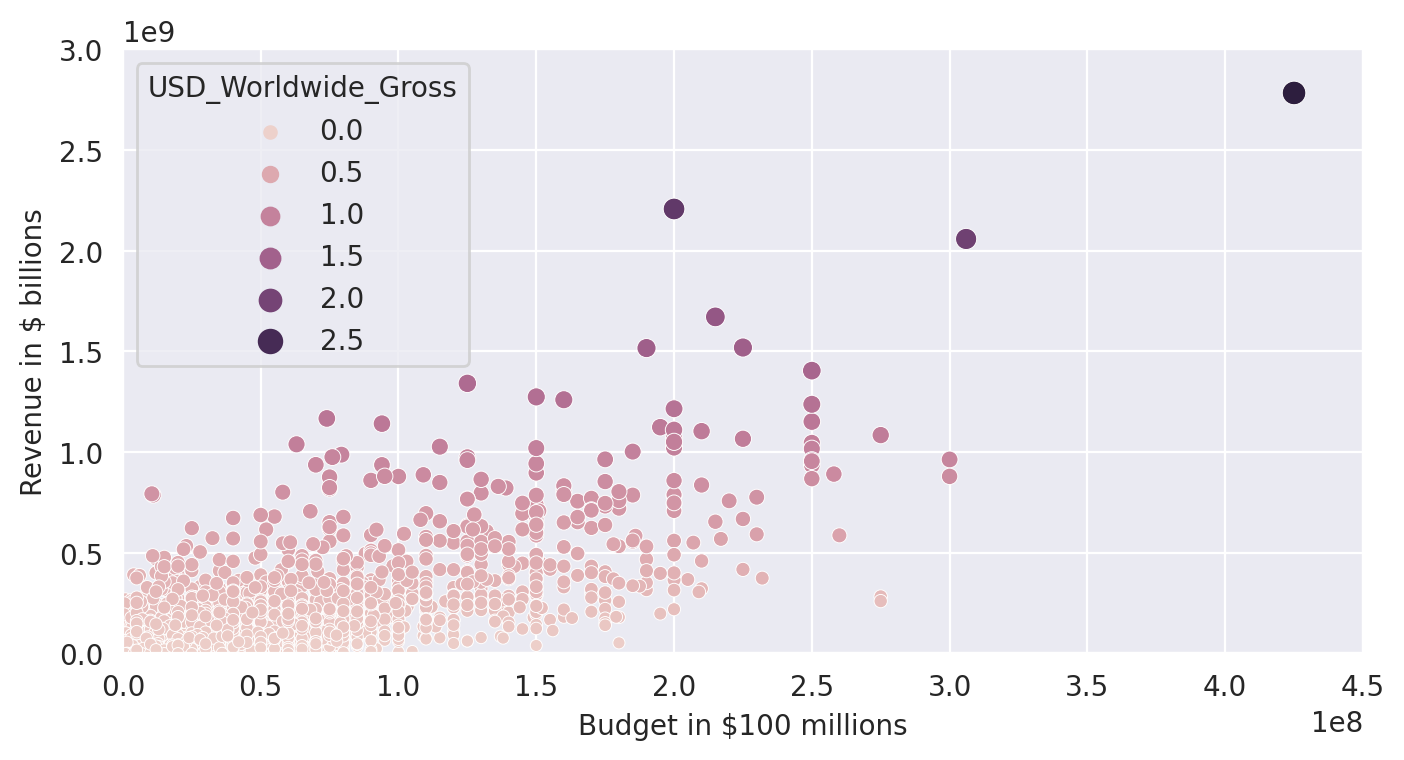

In [80]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget', 
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size
  
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)
 
plt.show()


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



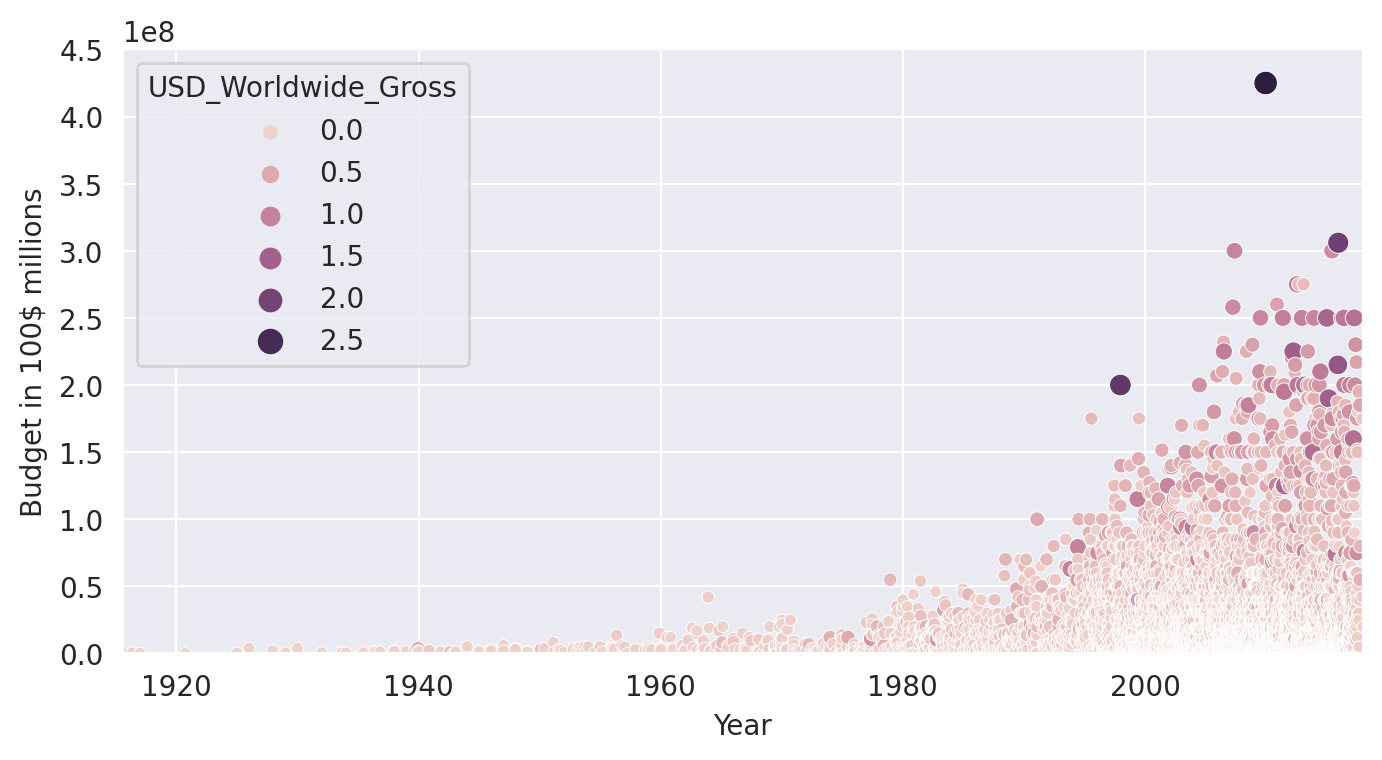

In [87]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='Release_Date', 
                      y='USD_Production_Budget',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size
  
  ax.set(ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Budget in 100$ millions',
        xlabel='Year',)
 
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [92]:
data_clean['Decade'] = pd.DatetimeIndex(data_clean.Release_Date).year//10*10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [99]:
old_films=data_clean[data_clean.Decade <= 1960]
new_films=data_clean[data_clean.Decade >= 1960]
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


# Seaborn Regression Plots

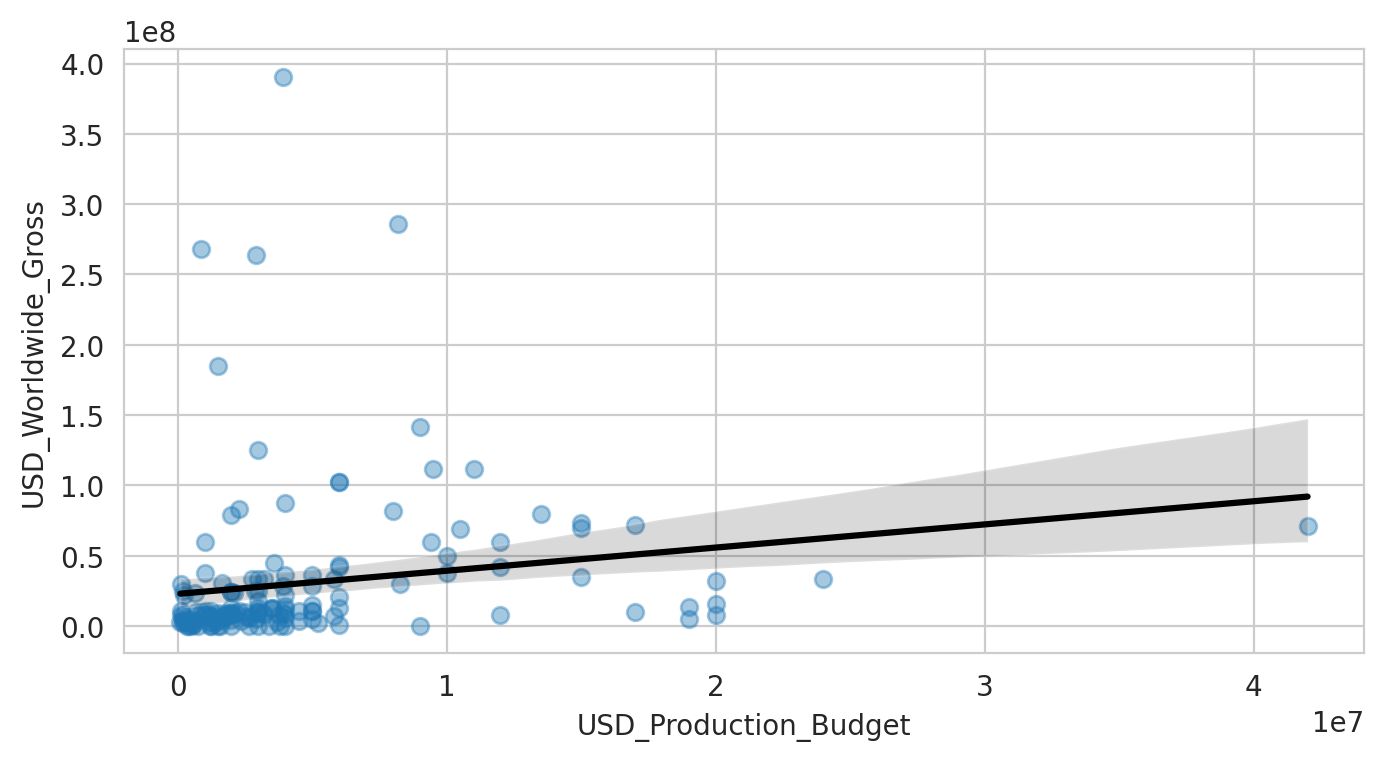

In [101]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

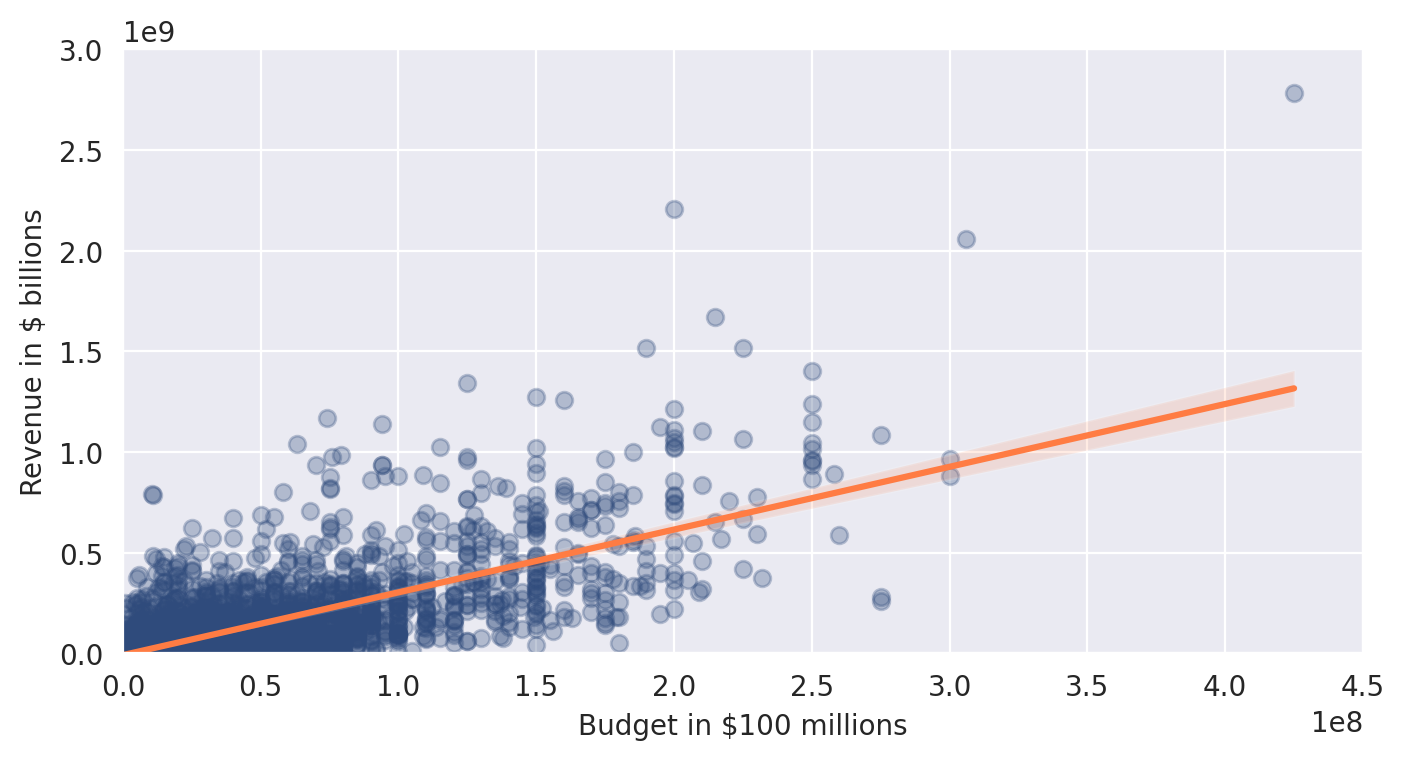

In [105]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [113]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)

# R-squared
print(regression.score(X, y))

[-8211648.30378592]
[[3.11761857]]
0.5574978047527492


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [114]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)

# R-squared
print(regression.score(X, y))

[22821538.63508039]
[[1.64771314]]
0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [116]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.


Use nested loops to remove unwanted characters from multiple columns

Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

Create bubble charts using the Seaborn Library

Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

Use floor division (i.e., integer division) to convert years to decades

Use Seaborn to superimpose a linear regressions over our data

Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

Run regressions with scikit-learn and calculate the coefficients.

